# Seaborn tutorial
Based on https://elitedatascience.com/python-seaborn-tutorial

Seaborn provides a high-level interface to Matplotlib, a powerful but sometimes unwieldy Python visualization library. For more information: http://seaborn.pydata.org/index.html


## 1. Importing libraries and dataset
First we import the necessary libraries. We use pandas for managing the data, matplotlib to have more additional customization and of course seaborn.

In [1]:
# Pandas for managing datasets
import pandas as pd

#Matplotlib for additional customization
from matplotlib import pyplot as plt
# To display your plots inside the notebook.
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns

We load the dataset and look at the first few lines. Here we are using a dataset about pokemons.

In [2]:
# Read dataset
df = pd.read_csv('Pokemon.csv')#, index_col=0)
# Display first 5 observations
df.head()

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


## 2. Seaborn's plotting functions

One of Seaborn's greatest strengths is its diversity of plotting functions. 

### 1. Scatter plot
First we will make a **scatter** plot using the function `lmplot()` to comapre the Attack and Defense stats for the Pokémon.

We do so by passing the DataFrame to the `data=` argument, while passing column names to the axes arguments, `x=` and `y=`.

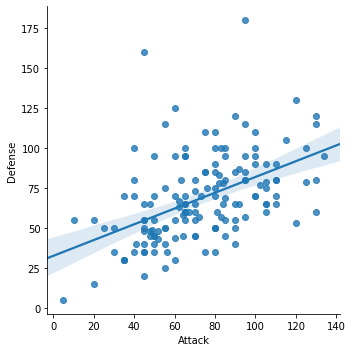

In [3]:
# Making a simple scatter plot
sns.lmplot(x='Attack', y='Defense', data=df)

We can also customize the scatterplot by adding arguments. 
- `fit_reg` controls whether we add a regression line
- `hue` allows us to color the dots depending on  another variable

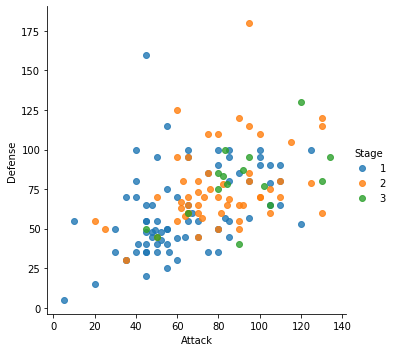

In [4]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

#### Using matplotlib

Seaborn is a high-level interface to Matplotlib.
We can use the matplotlib library to customize the plot further. 
First we need to invoke the seaborn plotting function and then we can invoke functions from matplotlib.

Here we tweak the axes.

(0, 141.9881096001028)

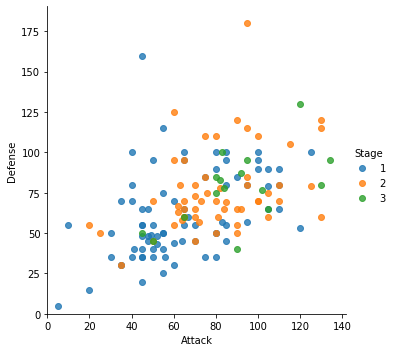

In [5]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

### 2. Boxplot

We use the function `boxplot()` to make a boxplot from a DataFrame. By simply calling it to the DataFrame, we will see the distribution of each variable. Here we can see the Pokémon's combat stats:

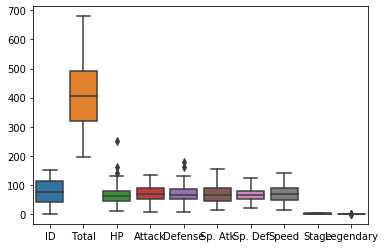

In [6]:
# Boxplot
sns.boxplot(data=df)

#### The role of Pandas
We can see that we would like to remove some columns.

- We can remove the Total since we have individual stats.
- We can remove the Stage and Legendary columns because they aren't combat stats.

This isn't easy to do within Seaborn alone. Instead, it's much simpler to pre-format the DataFrame.

We create a new DataFrame called `stats_df` that only keeps the stats columns:

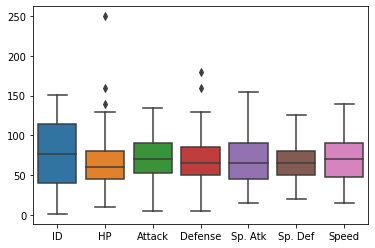

In [7]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

We can also get boxplots of a single variable by specifying the axes argument `y=`.

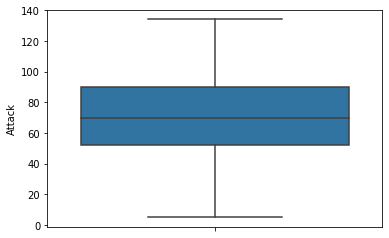

In [8]:
sns.boxplot(y='Attack', data=df)

If we additionally specify an axes arguments, `x=`, we get a boxplot conditioned on that variable. Here we see the distribution of the attack variable for different types of pokémon.

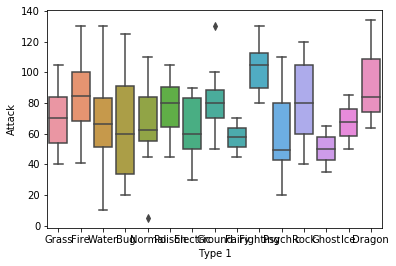

In [9]:
# Boxplot
sns.boxplot(x='Type 1', y='Attack', data=df)

#### Seaborn themes

Seaborn comes with style themes right out of the box. The default theme is called 'darkgrid'.

Available styles: 
- white
- dark
- whitegrid
- darkgrid
- ticks

Next, we'll change the theme in the boxplot to 'whitegrid'.

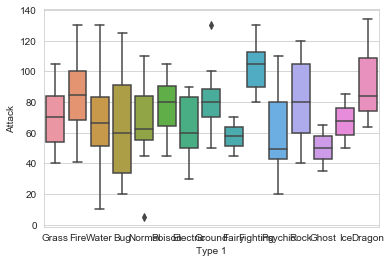

In [10]:
# Set theme
sns.set_style('whitegrid')
 
# Boxplot
sns.boxplot(x='Type 1', y='Attack', data=df)

#### Colors 
In the plot above, he colors are nonsensical. Why is the Grass type colored pink or the Water type colored orange? We can fix this!

Fortunately, Seaborn allows us to set custom color palettes. We can simply create an ordered Python list of color hex values.

Let's use Bulbapedia to help us create a new color palette and make a new boxplot.

In [11]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

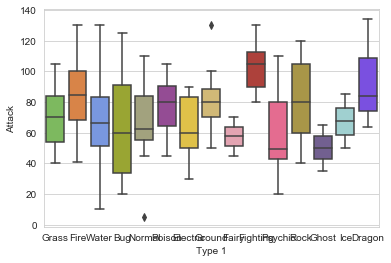

In [12]:
# Boxplot with Pokemon color palette
sns.boxplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

### 3. Violin plots
Violin plots are useful alternatives to box plots.
They show the distribution (through the thickness of the violin) instead of only the summary statistics.

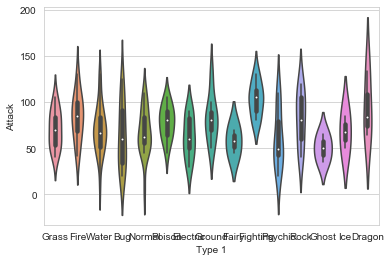

In [13]:
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

### 4. Swarmplot
We can display each point instead of showing the distirbution. This is achived with swarmplots which show each point, while "stacking" those with similar values

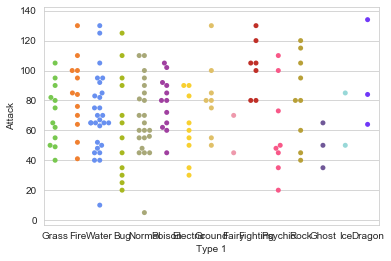

In [14]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

#### Overlaying plots.

It's pretty straightforward to overlay plots using Seaborn, and it works the same way as with Matplotlib. Here's what we'll do:

1. Make the figure larger using Matplotlib.
2. Plot the violin plot. However, set inner=None to remove the bars inside the violins.
3. Plot the swarm plot. This time, make the points black so they pop out more.
4. Set a title using Matplotlib.

Text(0.5, 1.0, 'Attack by Type')

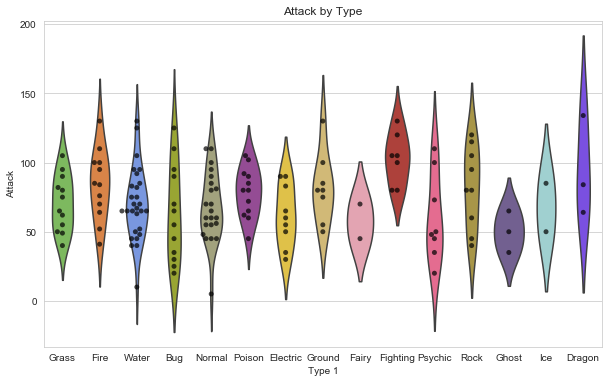

In [15]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

### 5. Heatmap
Heatmaps help you visualize matrix-like data. This plot shows the correlation between variables.

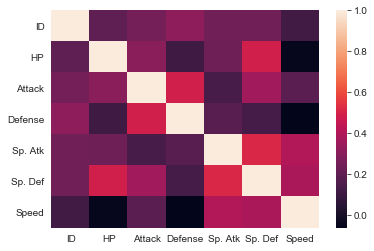

In [16]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

### 6. Histogram
Histograms allow you to plot the distributions of numeric variables.

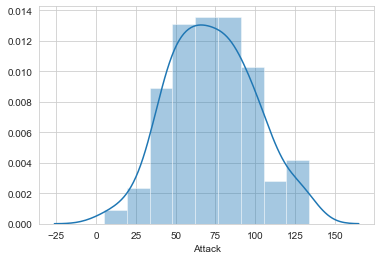

In [17]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

### 7. Bar Plot
Bar plots help you visualize the distributions of categorical variables.

Here we also rotate the labels on the x-axis to make them readable.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

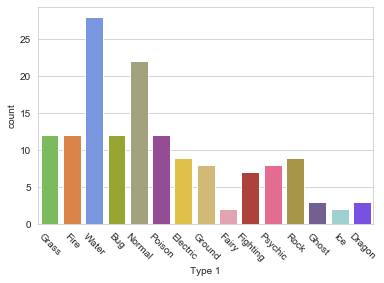

In [18]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

### 8 Factor Plot
Factor plots make it easy to separate plots by categorical classes.

/Users/mariaoskars/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


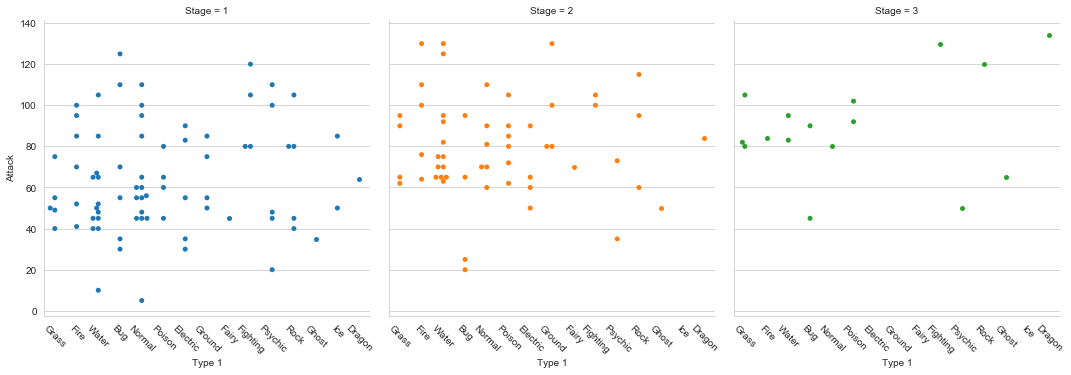

In [19]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

### 9. Density Plot
Density plots display the distribution between two variables.

Tip: Consider overlaying this with a scatter plot.

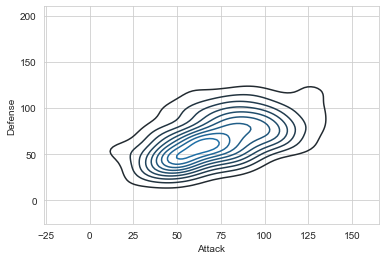

In [20]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

### 10. Joint Distribution Plot

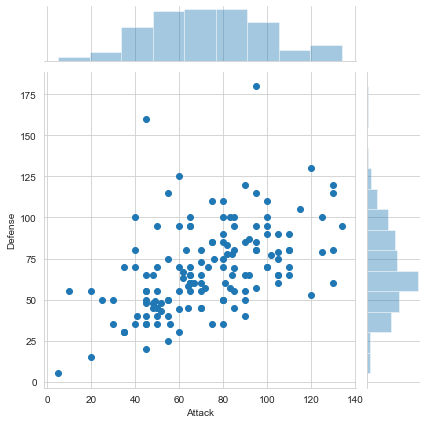

In [21]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)

## Additional examples
Here we are using `set_context()`. It controls the size of the lines, labels, and other parameters like that. In this plot ‘talk’ option was used. There are ‘paper’, ‘notebook’ and ‘poster’ options that are also available in the set_context() function. Please check them out.

### Scatter plot of Attack and Defense showing Stage and Speed

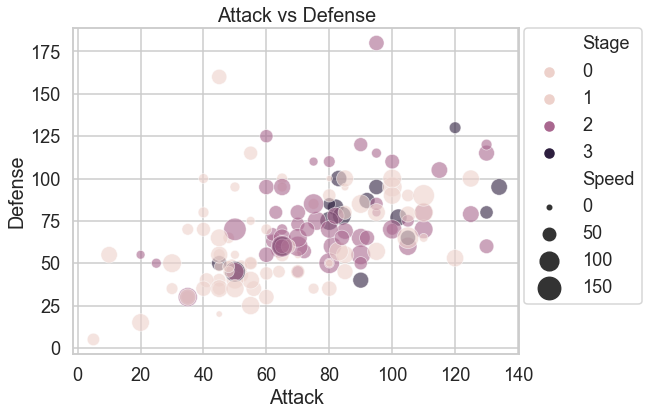

In [22]:
sns.set_context('talk', font_scale=1.1)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attack', y='Defense', data=df, 
                hue="Stage",size="Speed",
                sizes=(20, 500), alpha=0.6)

plt.xlabel("Attack")
plt.ylabel("Defense")
plt.title("Attack vs Defense")
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad=0)
plt.show()

### Barplot showing defense by Stage and Type 1, including error bars.

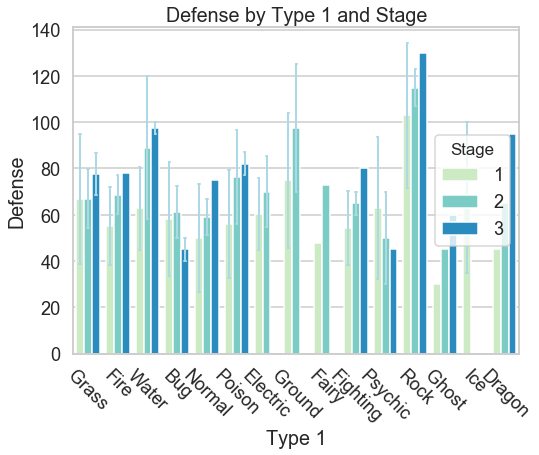

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Type 1', y= 'Defense', hue='Stage', 
            palette = 'GnBu',
            data=df, ci='sd',
           capsize=0.05,
           saturation=5,
           errcolor='lightblue',
           errwidth=2)
plt.xlabel("Type 1")
plt.ylabel("Defense")
plt.title("Defense by Type 1 and Stage")
plt.xticks(rotation=-45)
plt.show()

### Seaborn cheat sheet

http://datacamp-community-prod.s3.amazonaws.com/263130e2-2c92-4348-a356-9ed9b5034247

## matplotlib vs. seaborn

Lets compare the two libraries.

### Histogram

First we look at histograms with two variables.

This is the `matplotlib` version

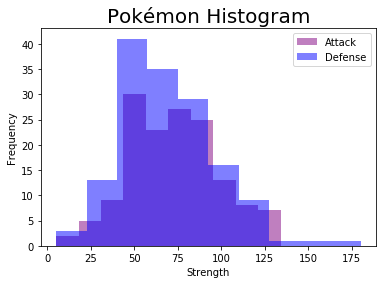

In [16]:
#set figure
f, ax = plt.subplots(1,1)
#graph histogram
plt.hist(df['Attack'], bins=10, alpha=0.5, color='purple', label='Attack')
plt.hist(df['Defense'], bins=10, alpha = 0.5, color='blue', label='Defense')
#set legend
plt.legend(loc='upper right')
#set title & axis titles
ax.set_title('Pokémon Histogram', fontsize=20)
ax.set_xlabel('Strength')
ax.set_ylabel('Frequency')

plt.show()

We can call seaborn, for example using the command below, to make the plot in seaborn style.

In [20]:
sns.set(style='darkgrid')

And then we make the plot again.

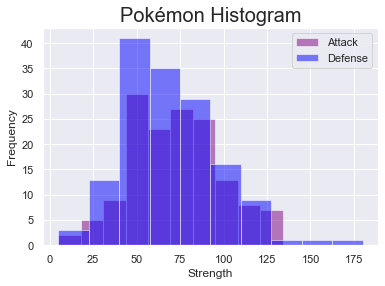

In [20]:
#set figure
f, ax = plt.subplots(1,1)
#graph histogram
plt.hist(df['Attack'], bins=10, alpha=0.5, color='purple', label='Attack')
plt.hist(df['Defense'], bins=10, alpha = 0.5, color='blue', label='Defense')
#set legend
plt.legend(loc='upper right')
#set title & axis titles
ax.set_title('Pokémon Histogram', fontsize=20)
ax.set_xlabel('Strength')
ax.set_ylabel('Frequency')
plt.show()

#### We can also make the histogram using methods from seaborn

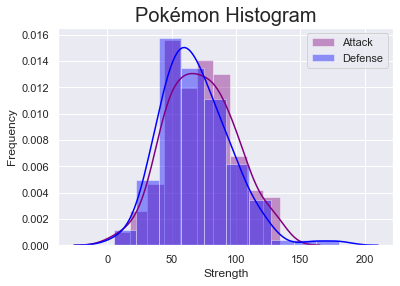

In [13]:
f, ax = plt.subplots(1,1)
sns.distplot(df['Attack'], bins=10, label='Attack', color='purple')
sns.distplot(df['Defense'], bins=10, label='Defense', color='blue')
ax.set_title('Pokémon Histogram', fontsize=20)
ax.set(xlabel='Strength', ylabel='Frequency')
ax.legend()

### Scatterplot
We also have a look at scatterplots in the two libraries.

First we use matplotlib.

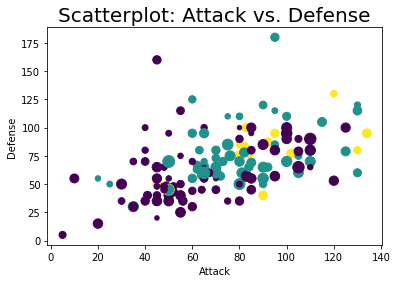

In [12]:
#set figure
f, ax = plt.subplots(1,1)
#plot
plt.scatter(df['Attack'], df['Defense'], s=df['Speed'],c=df['Stage'])

#set title & labels
plt.title('Scatterplot: Attack vs. Defense', fontsize=20)
plt.xlabel('Attack')
plt.ylabel('Defense')
#set x range
plt.show()

And then the same kind of plot using seaborn.

[Text(0, 0.5, 'Positivity'), Text(0.5, 0, 'Loudness')]

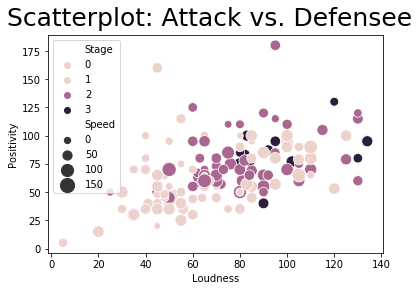

In [15]:
fig = sns.scatterplot(x=df['Attack'], y=df['Defense'],hue=df['Stage'], size = df['Speed'],sizes = (40,200))
fig.figure.suptitle('Scatterplot: Attack vs. Defensee', fontsize = 25)
fig.set(xlabel='Loudness', ylabel='Positivity')